# Polynomial Regression and Logistic Regression Analysis

---

*The dataset used here 'auto-mpg.data' that is available in the UCIMachine Learning Repository:*
<br>
*https://archive.ics.uci.edu/ml/datasets/Auto+MPG*

---

### Import the dataset
Try edit the import directory if you cannot import the dataset.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./auto-mpg.data', delim_whitespace=True, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])

In [2]:
print("Shape of the dataframe:", df.shape) # Have a overlook on row# and col# of the dataset
df.head(5)       # Display the first 5 rows of the dataframe.

Shape of the dataframe: (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


<br>

---

### Pre-process the data
This part works to drop some rows which have unsure values (?) in it.
<br>
**Notice:** do not compile this section twice，since some rows were already droped during the first compile.

In [3]:
# Drop rows with '?' in the horsepower column
df.drop(df[df['horsepower']=='?'].index,inplace=True)

In [4]:
# Convert all values in the horsepower column from string to numeric type.
df['horsepower'] = pd.to_numeric(df['horsepower'])

<br>

---

### Training set and Testing set

Divide the dataset into independent variables a dependent/predicted variable, X and Y.
<br>
Split the dataset to training set and testing set. 70% for training set and 30% for testing set.

In [5]:
from sklearn.model_selection import train_test_split

X_var = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration', 'model_year', 'origin']]
Y_var = df['weight']

x_train,x_test,y_train,y_test = train_test_split(X_var, Y_var, test_size=0.3)

<br>

---

### Using testing set to regress the dependent variable with 0~3 polynomial orders

Using testing set to regress 'weight' (dependent variable) on each of the 7 non-car_name features (independent variables) for the 0th to 3rd polynomial order of the independent variables.
<br>
&emsp;&emsp;**Note:** Because the results of predicted values are long lists of float numbers, so they are not printed out.
<br>
&emsp;&emsp;All results of predicted values are stored in lists named pred_0, pred_1, pred_2, and pred_3.
<br>
&emsp;&emsp;Instead, testing *mean squared errors (MSE)* for each variable and order are calculated individually.
>**Discussion:** The output MSE are all large numbers. I think this perhaps because: 
<br>
  1. Residual Error was not counted. 
<br>
  2. Datapoints are too fragmented, we need a higher degree model to fit the data.

In [6]:
print("Testing Set")

Y_test = np.array(y_test)

for i in x_test:
    X_test_i = np.array(x_test[i])
    
    print("    independent feature is: ", i)
    
    pred_0 = []
    pred_1 = []
    pred_2 = []
    pred_3 = []
    for j in range(len(X_test_i)):
    
        # order = 0
        X = np.c_[np.ones(len(X_test_i))]
        w_0 = X.T@Y_test@np.linalg.inv(X.T@X)
        pred = w_0[0]
        pred_0.append(pred)
    
        # order = 1
        X = np.c_[np.ones(len(X_test_i)), X_test_i]
        w_1 = X.T@Y_test@np.linalg.inv(X.T@X)
        pred = w_1[0] + w_1[1]*X_test_i[j]
        pred_1.append(pred)
        
        # order = 2
        X = np.c_[np.ones(len(X_test_i)), X_test_i, np.square(X_test_i)]
        w_2 = X.T@Y_test@np.linalg.inv(X.T@X)
        pred = w_2[0] + w_2[1]*X_test_i[j] + w_2[2]*np.square(X_test_i[j])
        pred_2.append(pred)
        
        # order = 3
        X = np.c_[np.ones(len(X_test_i)), X_test_i, np.square(X_test_i), np.power(X_test_i, 3)]
        w_3 = X.T@Y_test@np.linalg.inv(X.T@X)
        pred = w_3[0] + w_3[1]*X_test_i[j] + w_3[2]*np.square(X_test_i[j]) + w_3[3]*np.power(X_test_i[j], 3)
        pred_3.append(pred)
    
    sum_0 = 0
    sum_1 = 0
    sum_2 = 0
    sum_3 = 0
    for k in range(len(Y_test)):
        sum_0 += (Y_test[k]-pred_0[k])**2
        sum_1 += (Y_test[k]-pred_1[k])**2
        sum_2 += (Y_test[k]-pred_2[k])**2
        sum_3 += (Y_test[k]-pred_3[k])**2
    mse_0 = sum_0/len(Y_test)
    mse_1 = sum_1/len(Y_test)
    mse_2 = sum_2/len(Y_test)
    mse_3 = sum_3/len(Y_test)
    
    print("        order = 0, MSE =", mse_0)
    print("        order = 1, MSE =", mse_1)
    print("        order = 2, MSE =", mse_2)
    print("        order = 3, MSE =", mse_3)

Testing Set
    independent feature is:  mpg
        order = 0, MSE = 712025.203174375
        order = 1, MSE = 198655.88276698504
        order = 2, MSE = 138317.37604920467
        order = 3, MSE = 136826.7918174994
    independent feature is:  cylinders
        order = 0, MSE = 712025.203174375
        order = 1, MSE = 141355.08447563095
        order = 2, MSE = 140689.4067246952
        order = 3, MSE = 135525.27910415642
    independent feature is:  displacement
        order = 0, MSE = 712025.203174375
        order = 1, MSE = 90507.8473447668
        order = 2, MSE = 79049.85330920485
        order = 3, MSE = 78834.92112068247
    independent feature is:  horsepower
        order = 0, MSE = 712025.203174375
        order = 1, MSE = 174465.49360626502
        order = 2, MSE = 149806.00879212873
        order = 3, MSE = 148899.3861260864
    independent feature is:  acceleration
        order = 0, MSE = 712025.203174375
        order = 1, MSE = 587281.5703445385
        order = 2,

<br>

---

### Plot Polynomial Regression results

Plot the lines and data for the testing set, one plot per variable.
<br>
Each graph contains a feature's datapoints, and four lines (Red-degree0;Yellow-degree1;Green-degree2;Blue-degree3).
>**Discussion:** Orders form 0 to 2 are obviously underfitting to the test set. Therefore, order = 3 best fits the test set. 
<br>
Higher order perhaps fit the test set even better.

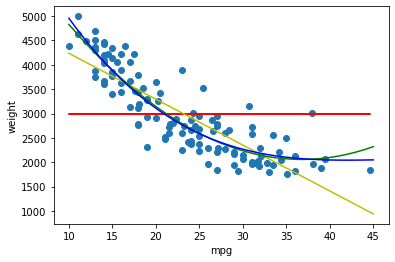

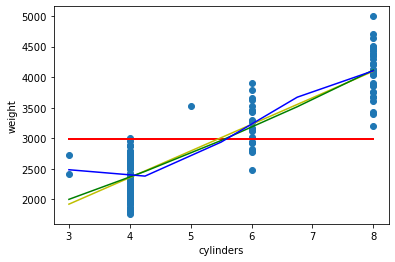

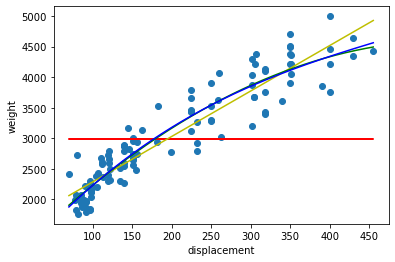

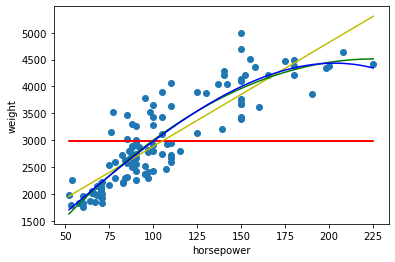

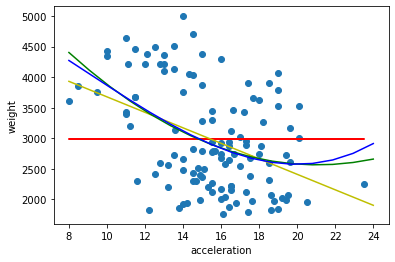

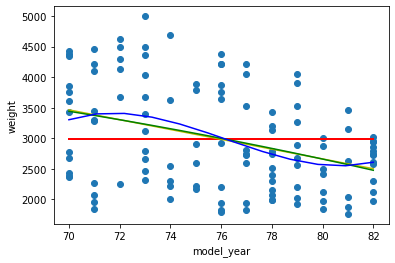

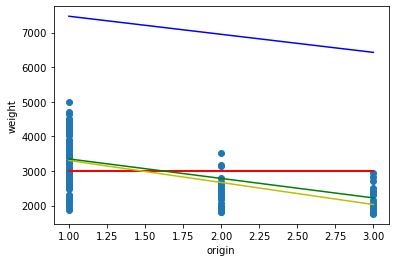

In [7]:
import matplotlib.pyplot as plt
import math

for i in x_test:
    # Plot datapoints on the graph.
    x = np.array(x_test[i])
    y = np.array(y_test)
    plt.scatter(x, y)
    
    # order = 0
    # Plot regression lines with degree 0.
    X = np.c_[np.ones(len(x))]
    w_0 = X.T@y@np.linalg.inv(X.T@X)
    fx = x
    fy = w_0[0]*X
    plt.plot(fx, fy, 'r')

    # order = 1
    # Plot regression lines with degree 1.
    X = np.c_[np.ones(len(x)), x]
    w_1 = X.T@y@np.linalg.inv(X.T@X)
    fx = np.linspace(math.floor(x.min()), math.ceil(x.max()), math.ceil(x.max())-math.floor(x.min()))
    fy = w_1[0] + w_1[1]*fx
    plt.plot(fx, fy, 'y')

    # order = 2
    # Plot regression lines with degree 2.
    X = np.c_[np.ones(len(x)), x, np.square(x)]
    w_2 = X.T@y@np.linalg.inv(X.T@X)
    fx = np.linspace(math.floor(x.min()), math.ceil(x.max()), math.ceil(x.max())-math.floor(x.min()))
    fy = w_2[0] + w_2[1]*fx + w_2[2]*np.square(fx)
    plt.plot(fx, fy, 'g')

    # order = 3
    # Plot regression lines with degree 3.
    X = np.c_[np.ones(len(x)), x, np.square(x), np.power(x, 3)]
    w_3 = X.T@y@np.linalg.inv(X.T@X)
    fx = np.linspace(math.floor(x.min()), math.ceil(x.max()), math.ceil(x.max())-math.floor(x.min()))
    fy = w_3[0] + w_3[1]*fx + w_3[2]*np.square(fx) + w_3[3]*np.power(fx, 3)
    plt.plot(fx, fy, 'b')
    
    # Show x label and y label.
    plt.xlabel(i)
    plt.ylabel('weight')
    
    # output the plotted graph containing datapoints and four lines with degrees from 0 to 3.
    plt.show()

<br>

---

### Using Logistic Regression perform classification on the dependent variable 

Using the 1st order logistic regression to perform classification on the various classes (light/medium/heavy). One regression model per feature.
<br>
Then, import LinearRegression from sklearn. Build a logical regression model for each feature.
<br>
&emsp; Train the model with training set; test it with testing set.
<br>
The testing results of this logical regression model is not printed out because it is too long.
<br>
If you want to have a look at it, please print the y_pred variable.

#### 1. Preprocess dataset
Firstly, normalize the numeric weight to categories (light/medium/heavy).
<br>
&emsp;&emsp;Create a new feature column called 'weight_categ' append to the dataframe.

In [8]:
# @Siyuan Yao.

min_wt = min(df['weight'])
max_wt = max(df['weight'])
per_bin = (max_wt - min_wt)/3

bin1_start = min(df['weight'])
bin1_end = bin1_start + per_bin
bin2_end = bin1_end + per_bin

def label_wt(row):
    if bin1_start <= row['weight'] and row['weight'] <= bin1_end:
        return 'light'
    elif row['weight'] <= bin2_end:
        return 'medium'
    else:
        return 'heavy'
df['weight_categ'] = df.apply(lambda row: label_wt(row),axis=1)

In [9]:
# Have a look at the new feature 'weight_categ' append to the dataframe.
df[['weight', 'weight_categ']].head(3)

,weight,weight_categ
0,3504.0,medium
1,3693.0,medium
2,3436.0,medium


#### 2. Split dataset into training & testing set
Split the dataframe again, because the new dependent variable is 'weight_categ' now.

In [10]:
# Split the dataframe again
# The new dependent variable is 'weight_categ' now.
X_var = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration', 'model_year', 'origin']]
Y_var = df['weight_categ']
x_train,x_test,y_train,y_test = train_test_split(X_var, Y_var, test_size=0.3)

#### 3. Using LogisticRegression to make prediction
Import LinearRegression from sklearn. Build a logical regression model for each feature. Train the model with training set; test it with testing set.
<br>
&emsp;&emsp; The testing results of this logical regression model are not printed out because it is too long. Print the y_pred variable to have a look at it.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

# For each feature in test_set:
for i in x_test:
    log = LogisticRegression()
    # Train the logical regression model.
    log.fit(np.array(x_train[i]).reshape(-1, 1), y_train)
    # Test the model.
    y_pred = log.predict(np.array(x_test[i]).reshape(-1, 1))
    
    #print(y_pred)

#### 4. A small predicted fragment
Using the first three rows of the test set to show a comparison between real results and predicted results.

In [12]:
# First three rows of the independent variables in the test set.
x_test[0:3]

,mpg,cylinders,displacement,horsepower,acceleration,model_year,origin
320,37.0,4,119.0,92.0,15.0,80,3
188,16.0,8,318.0,150.0,13.0,76,1
58,25.0,4,97.5,80.0,17.0,72,1


In [13]:
# The real result according to the first three rows of the independent variables in the test set.
y_test[0:3]

320    light
188    heavy
58     light
Name: weight_categ, dtype: object

In [14]:
# Predicted result respectively given by each of the independent variables in the test set
for i in x_test:
    y_pred_example = log.predict(np.array(x_test[i].iloc[0:3]).reshape(-1, 1))
    
    print("Independent variable is:", i)
    print("Predicted value is:", y_pred_example)

Independent variable is: mpg
Predicted value is: ['light' 'light' 'light']
Independent variable is: cylinders
Predicted value is: ['light' 'light' 'light']
Independent variable is: displacement
Predicted value is: ['light' 'light' 'light']
Independent variable is: horsepower
Predicted value is: ['light' 'light' 'light']
Independent variable is: acceleration
Predicted value is: ['light' 'light' 'light']
Independent variable is: model_year
Predicted value is: ['light' 'light' 'light']
Independent variable is: origin
Predicted value is: ['light' 'medium' 'medium']


---

### Evaluation on testing set's classification performance
Report the testing classification performance using both precision and recall.
>**Discussion:** Both precision and recall are therefore based on relevance.
<br>
Therefore, a higher precision and recall score is more desirable.

In [15]:
from sklearn.metrics import precision_score, recall_score

# For each feature in test_set:
for i in x_test:
    log = LogisticRegression()
    # Train the logical regression model.
    log.fit(np.array(x_train[i]).reshape(-1, 1), y_train)
     # Test the model.
    y_pred = log.predict(np.array(x_test[i]).reshape(-1, 1))
    
    # Precision Score:
    ps = precision_score(y_test,y_pred,average='macro',zero_division=0)
    # Recall Score:
    rs = recall_score(y_test,y_pred,average='macro',zero_division=0)
    
    print("independent feature is:", i)
    print("    precision score is:", ps)
    print("    recall score is:", rs)

independent feature is: mpg
    precision score is: 0.7800293961284673
    recall score is: 0.7321385902031063
independent feature is: cylinders
    precision score is: 0.844949494949495
    recall score is: 0.853942652329749
independent feature is: displacement
    precision score is: 0.7755083081170038
    recall score is: 0.7612504978096375
independent feature is: horsepower
    precision score is: 0.7716244476940736
    recall score is: 0.7118677817602549
independent feature is: acceleration
    precision score is: 0.4529342723004695
    recall score is: 0.40412186379928317
independent feature is: model_year
    precision score is: 0.35360623781676415
    recall score is: 0.3264436479490243
independent feature is: origin
    precision score is: 0.38031886812374616
    recall score is: 0.44695340501792113


---

### Re-do the LogisticRegression training&testing with Min-max Normalization

Min-max normalization is applied to the train and test set this time.
>**Discussion:** For some features, both of their precision and recall score increase or decrease together.
<br>
For some features, their precision and recall score just remain the same.

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 

for i in x_test:
    X_train = scaler.fit_transform(np.array(x_train[i]).reshape(-1, 1))
    X_test = scaler.fit_transform(np.array(x_test[i]).reshape(-1, 1))
    
    log = LogisticRegression()
    log.fit(X_train, y_train)
    
    y_pred = log.predict(X_test)
    
    ps = precision_score(y_test,y_pred,average='macro',zero_division=0)
    rs = recall_score(y_test,y_pred,average='macro',zero_division=0)
    
    print("independent feature is:", i)
    print("    precision score is:", ps)
    print("    recall score is:", rs)

independent feature is: mpg
    precision score is: 0.4519774011299435
    recall score is: 0.5795698924731183
independent feature is: cylinders
    precision score is: 0.4549808429118774
    recall score is: 0.5851254480286738
independent feature is: displacement
    precision score is: 0.7460470924728583
    recall score is: 0.673078454798885
independent feature is: horsepower
    precision score is: 0.688888888888889
    recall score is: 0.5727598566308244
independent feature is: acceleration
    precision score is: 0.5924398625429553
    recall score is: 0.3664675428116288
independent feature is: model_year
    precision score is: 0.2160039273441335
    recall score is: 0.30448028673835126
independent feature is: origin
    precision score is: 0.38031886812374616
    recall score is: 0.44695340501792113
